In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from deepq import DeepQPlayer,RandomPlayer,QPlayer,Board,DeepQPlayerV2,generate_random_board,visualize
from IPython.display import clear_output
import time

/home/alexshock/miniconda3/envs/tf_2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tf.config.list_physical_devices(
    device_type=None
)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()

In [4]:
def replay(all_boards,sleep_time:int=1):
    for board in all_boards:
        visualize(board)
        time.sleep(sleep_time)
        clear_output(wait=True)

In [5]:
def get_next_board_state(board,action,player_symbol):
    try:
        _board = board.copy()
        col = _board[:,action]
        idx = int(np.where(col == 0)[0][-1])
        col[idx] = player_symbol
        return _board
    except:
        return None
def get_possible_moves(board):
    return [i for i,j in enumerate(board[0]) if j == 0]

In [6]:
def test_simulate_game(player:DeepQPlayer,num_moves=4):
    player.reset()
    brd = np.zeros(shape=(player.num_cols,player.num_rows))
    for i in range(num_moves):
        p1_act = player.choose_action(get_possible_moves(brd),brd)
        brd = get_next_board_state(brd,p1_act,player.player_symbol)
        brd = get_next_board_state(brd,np.random.choice(get_possible_moves(brd)),player.player_symbol * -1)

        player.give_reward(0,s_prime=brd)
        

# test_simulate_game(p)
    

In [7]:
def custom_cooling(eps,itr):
    if itr < 25000 :
        return eps
    elif itr < 50000 :
        return eps / 2.0
    elif itr < 75000 :
        return eps / 4.0
    else:
        return eps / 8.0
    
q1 = DeepQPlayerV2(player_symbol=1,name='q_1_cooling_deep')


q1.loadPolicy('q_network_qv2_1_cooling_deep')
# q2 = QPlayer(player_symbol=-1,name='q_2_cooling_deep')
r2 = RandomPlayer(player_symbol=-1)

b = Board(q1,r2,num_rows=6,num_cols=7,cooling_func=custom_cooling)

q_1_cooling_deep Loaded Q and Q Prime networks from file q_network_qv2_1_cooling_deep


In [8]:
winners = []

r2 = RandomPlayer(player_symbol=-1)
# q2.loadPolicy('policy_q_2_cooling')
b2 = Board(q1,r2,num_rows=6,num_cols=7)
for i in range(100):
    q1.epsilon = 0.0
    # q2.epsilon = 0.0
    winners.append(b2.play_agents(verbose=False))
    b2.reset()
    q1.reset()
    # q2.reset()

winners = [i if i is not None else 0 for i in winners]
print(np.unique(winners,return_counts=True))



(array([-1,  1]), array([ 5, 95]))


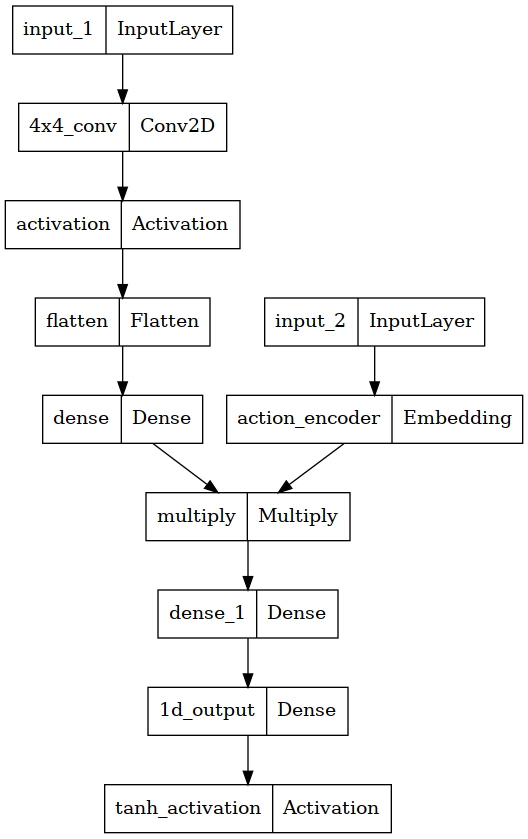

In [9]:
tf.keras.utils.plot_model(q1.q_network)

[0.07107629 0.09983208 0.12190982 0.09852658 0.13859098 0.17085011
 0.0882379 ]


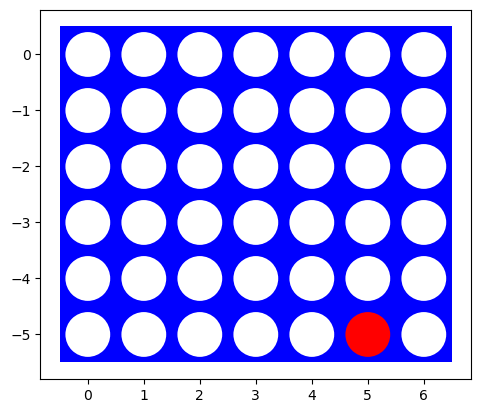

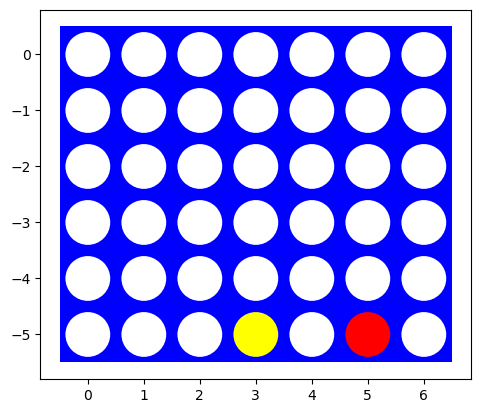


[0.12539034 0.0726984  0.11086167 0.06119229 0.18715574 0.17766844
 0.07858986]


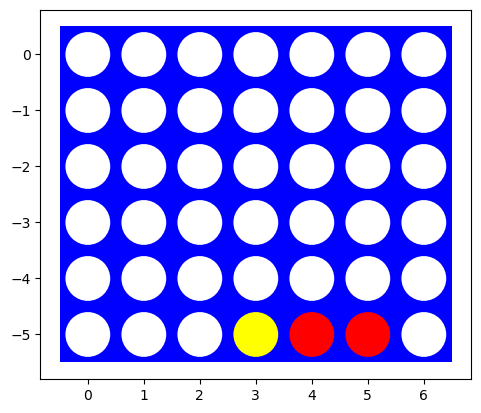

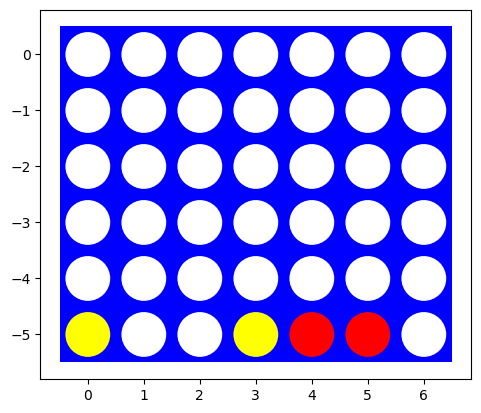


[0.1323179  0.02542546 0.15023774 0.00381471 0.2159888  0.23904733
 0.1544768 ]


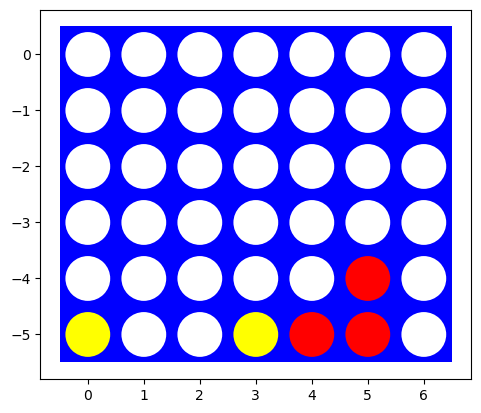

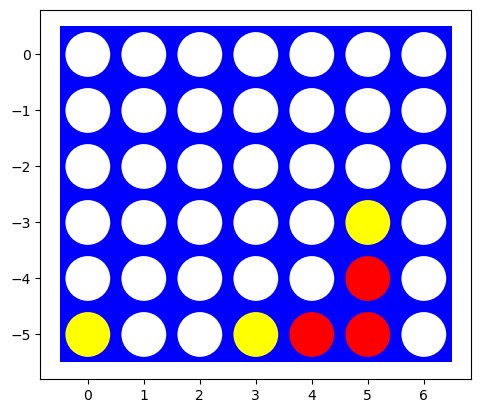


[ 0.07318809  0.09762472 -0.07608987 -0.02619072  0.23066686  0.2910107
  0.10257958]


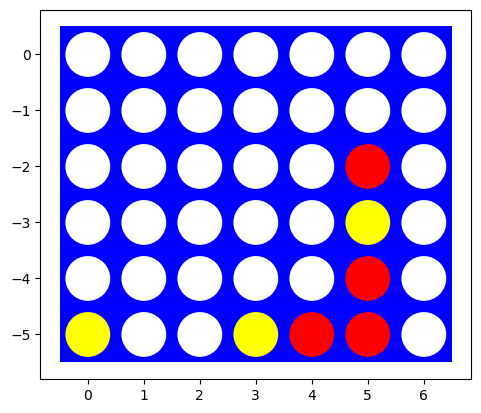

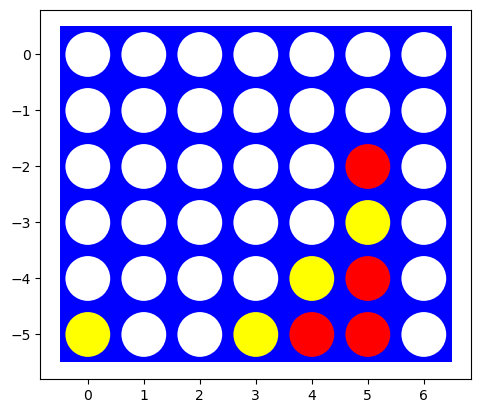


[ 0.00619322  0.12294513  0.00634769 -0.03496322  0.13351409  0.29465055
  0.02585669]


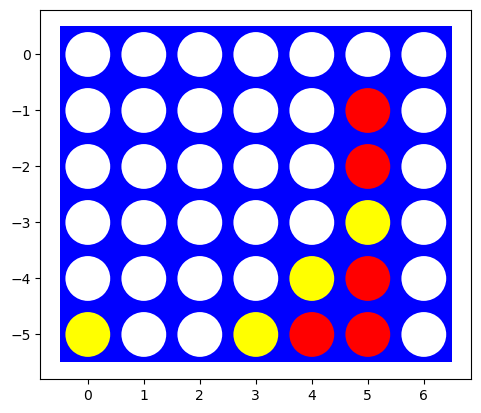

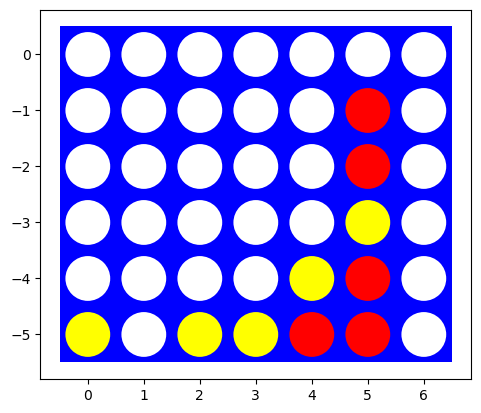


[-0.28046662  0.01963893  0.00414233 -0.00618027  0.10296262  0.21807134
  0.0023898 ]


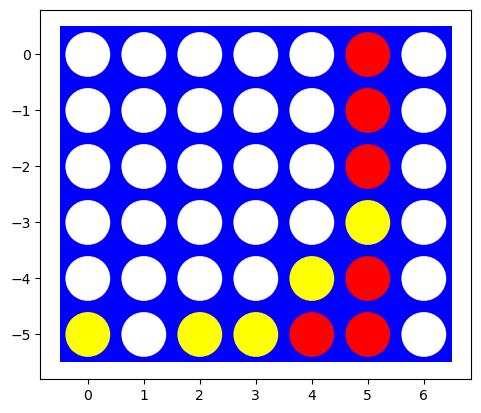

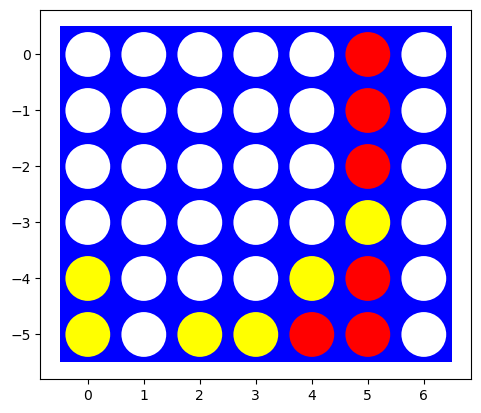


[-0.18165217  0.0744758   0.1077403   0.04565585  0.12179533  0.19381465
  0.03507274]


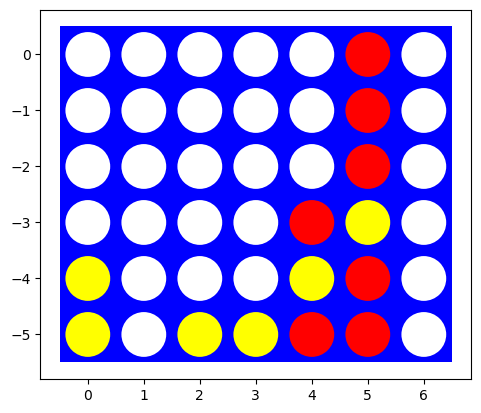

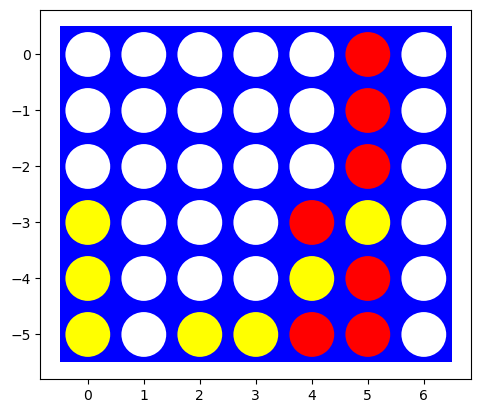


[-0.16383629 -0.02365285 -0.01879596  0.03195039 -0.0361268   0.06698706
 -0.01938082]


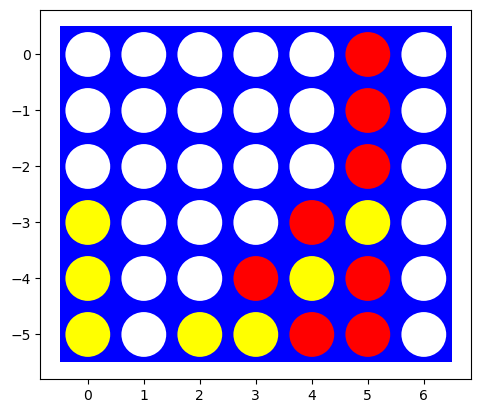

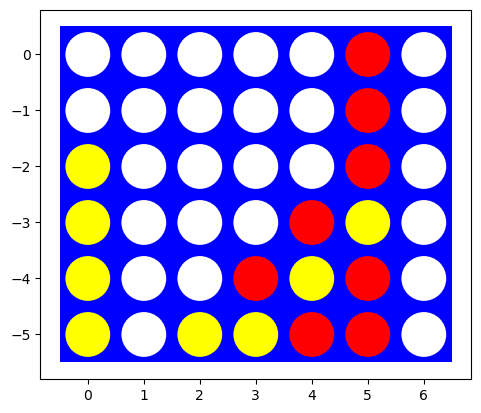


Player -1 Wins!


In [13]:
q1.reset()
# q2.reset()
q1.epsilon = 0.0
# q2.epsilon = 0.5
b2.reset()
boards = b2.play_agents(return_boards=False,verbose=2)

# replay(boards)

In [11]:
tmp = tf.keras.models.load_model('q_network_q_1_cooling_deep')


In [12]:
tmp([np.zeros(shape=(1,4,4,1)),np.array([1]).reshape(1,1)])

ValueError: Exception encountered when calling layer 'model' (type Functional).

Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 52, but received input with shape (1, 49)

Call arguments received by layer 'model' (type Functional):
  • inputs=['tf.Tensor(shape=(1, 4, 4, 1), dtype=float64)', 'tf.Tensor(shape=(1, 1), dtype=int64)']
  • training=None
  • mask=None